In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [10]:
size = 0
for file_name in glob.glob('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_1*_data.npy'):
    x = np.load(file_name, mmap_mode="r")
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_15_data.npy 637
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_12_data.npy 656
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_1_data.npy 618
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_14_data.npy 686
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_13_data.npy 592
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_17_data.npy 643
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_11_data.npy 653
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_19_data.npy 672
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_10_data.npy 650
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_16_data

In [12]:
dtype = np.load('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_15_data.npy', mmap_mode="r")[0].dtype

In [79]:
pos = 0
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_old_NuENC_1_1.npy', mode = 'w+', dtype = dtype, shape=(size,1))
for file_name in glob.glob('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_1?_data.npy'):
    x = np.load(file_name, mmap_mode="r")
    print(file_name, x.shape)
    data[pos:pos+len(x)] = x
    pos = pos + len(x)

/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_15_data.npy (637, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_12_data.npy (656, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_14_data.npy (686, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_13_data.npy (592, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_17_data.npy (643, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_11_data.npy (653, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_19_data.npy (672, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_10_data.npy (650, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_16_data.npy (609, 1)
/home/dup193/work/double_pulse/data/LoganVeto_

In [80]:
data = np.load('/home/dup193/work/double_pulse/data/images_3str/Images_NuE_2_1_1_data.npz')['arr_0']
print(data.shape)
data_old = np.load('/fastio2/dasha/double_pulse/data_old_NuENC_1_1.npy')
print(data_old.shape)

(7356, 1)
(7044, 1)


In [81]:
list_n = [tuple(i[0]) for i in data['id']]
list_o = [tuple(i[0]) for i in data_old['id']]
print(len(list_n),list_n[0])
print(len(list_o),list_o[0])

7356 (167, 4294967295, 13, 0)
7044 (155, 4294967295, 51, 0)


In [82]:
set_n = set(list_n)
set_o = set(list_o)
diff = set_o.difference(set_n) 
diff2 = set_n.difference(set_o) 

In [83]:
print(len(diff),list(diff)[0:10])
print(len(diff2),list(diff2)[0:10])

1 [(0, 0, 0, 0)]
930 [(121, 4294967295, 1731, 0), (143, 4294967295, 424, 0), (172, 4294967295, 338, 0), (144, 4294967295, 1431, 0), (103, 4294967295, 1460, 0), (119, 4294967295, 942, 0), (103, 4294967295, 234, 0), (162, 4294967295, 106, 0), (158, 4294967295, 963, 0), (165, 4294967295, 1096, 0)]


In [73]:
np.save("/home/dup193/work/double_pulse/Diff_old_IDs.npy",list(diff))

In [27]:
diff_events = []
for i in data:
    if tuple(i['id'][0]) in diff:
        diff_events.append(i)
diff_events = np.array(diff_events)

In [65]:
np.unique(diff_events['weight']['InteractionType'])

array([2.], dtype=float32)

In [63]:
print(np.sum(diff_events['qtot']>1000))
print(np.sum(diff_events['qst'][:,0]['q'][:,0]>400))

930
930


In [33]:
data_all = np.load('/home/dup193/work/double_pulse/data/mctree_check/NewFormat_All_MCTree_NuE_1_data.npz')['arr_0']
print(data_all.shape)

(1412887, 1)


In [34]:
diff_events_all = []
for i in data_all:
    if tuple(i['id'][0]) in diff:
        diff_events_all.append(i)
diff_events_all = np.array(diff_events_all)

In [36]:
print(diff_events_all[0].dtype)

[('id', [('run_id', '<u4'), ('sub_run_id', '<u4'), ('event_id', '<u4'), ('sub_event_id', '<u4')]), ('neutrino', [('tree_id', '<u4', (2,)), ('pdg', '<i4'), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')]), ('nutaus', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')], (10,)), ('taus', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')], (10,)), ('muons', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '

In [42]:
print(len(diff_events_all))
dkeys = diff_events_all['keys']
print(dkeys[0].dtype.names)

930
('passed', 'header', 'raw_data', 'weights', 'mctree', 'cvstats', 'pulses', 'conventional', 'simtrimmer', 'filtermask')


['passed', 'header', 'raw_data', 'weights', 'mctree', 'cvstats', 'pulses', 'conventional', 'simtrimmer', 'filtermask']
[96.66666666666667, 100.0, 100.0, 100.0, 100.0, 96.66666666666667, 100.0, 56.88172043010753, 0.0, 100.0]


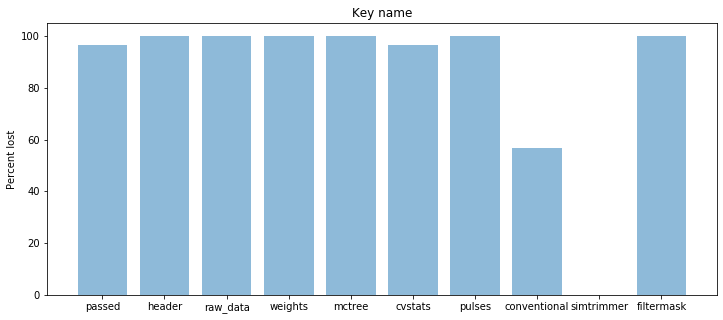

In [48]:
fig = plt.figure(figsize=(12,5),facecolor='w')
objects = list(dkeys[0].dtype.names)
#objects.remove('conventional')
#objects.remove('simtrimmer')
#objects.remove('filtermask')

print(objects)
y_pos = np.arange(len(objects))

perc = [np.sum(dkeys['passed']), np.sum(dkeys['header']), np.sum(dkeys['raw_data']),np.sum(dkeys['weights']), np.sum(dkeys['mctree']), np.sum(dkeys['cvstats']), np.sum(dkeys['pulses']), np.sum(dkeys['conventional']), np.sum(dkeys['simtrimmer']), np.sum(dkeys['filtermask'])]
perc = [i/len(dkeys)*100 for i in perc]
print(perc)
plt.bar(y_pos, perc, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
#plt.yscale('log')
plt.ylabel('Percent lost')
plt.title('Key name')

plt.show()

[([3141174337,         50], -16, 32941.242, [-1354.5045, -1323.9027,  1947.7186], [0.6061273, 3.9867737], -74.84508, 2908.0742)] [2187.975]
[([3141174337,        630], 16, 8402.454, [1368.9543, -543.9744, 1947.8298], [0.6218106, 5.943934 ], -110.198105, 2968.196)] [1537.55]


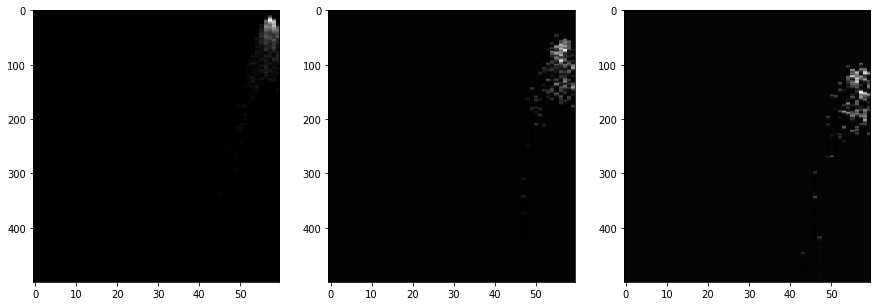

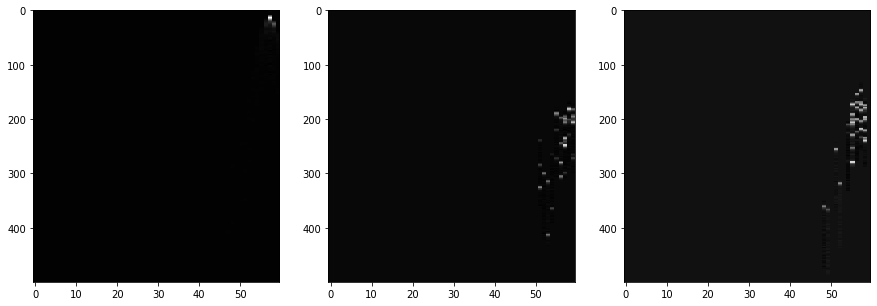

In [29]:
for i, im in enumerate(data['image']):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(im[0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(im[0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(im[0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
    print(data['primary'][i],data['qtot'][i])

In [30]:
data['logan_veto']

array([[(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)]],
      dtype=[('SPE_rlogl', '<f4'), ('Cascade_rlogl', '<f4'), ('SPE_rlogl_noDC', '<f4'), ('Cascade_rlogl_noDC', '<f4'), ('FirstHitZ', '<f4'), ('VHESelfVetoVertexPosZ', '<f4'), ('LeastDistanceToPolygon_Veto', '<f4')])

In [31]:
data['hese']

array([[(1757.525, False, [-200.55   ,  -74.03   , -448.82285], 9946., -24.429226)],
       [(   0.   , False, [-279.53   ,   23.17   , -467.58   ], 9895.,   0.      )]],
      dtype=[('qtot', '<f4'), ('vheselfveto', '?'), ('vheselfvetovertexpos', '<f4', (3,)), ('vheselfvetovertextime', '<f4'), ('llhratio', '<f4')])

In [33]:
data['hese_old']

array([[(1757.525, False, [ -200.55   ,   -74.03   ,  -448.82285],  9946., -24.429226)],
       [(   0.   ,  True, [-9999.     , -9999.     , -9999.     ], 99999.,   0.      )]],
      dtype=[('qtot', '<f4'), ('vheselfveto', '?'), ('vheselfvetovertexpos', '<f4', (3,)), ('vheselfvetovertextime', '<f4'), ('llhratio', '<f4')])

In [18]:
hese_ec = np.load('/fastio2/dasha/double_pulse/HESE_ec.npy', mmap_mode = 'r')
print(hese_ec[0])

((11511, 4294967295, 15, 0), 0., 0.)
